Importing modules

In [1]:
import pandas as pd
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords  
nltk.download('wordnet')
import time
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Importing methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to C:\Users\Mantas
[nltk_data]     Lukauskas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mantas
[nltk_data]     Lukauskas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading files and concat them into one

In [2]:
colnames =["Review"]
pos_review = pd.read_csv("Raw data/rt-polarity_pos.csv", names=colnames, sep='|', encoding='latin-1')
pos_review["Class"] = 1
neg_review = pd.read_csv("Raw data/rt-polarity_neg.csv", names=colnames, sep='|', encoding='latin-1')
neg_review["Class"] = 0
reviews = pd.concat([pos_review, neg_review], ignore_index=True)

Information about Class distribution

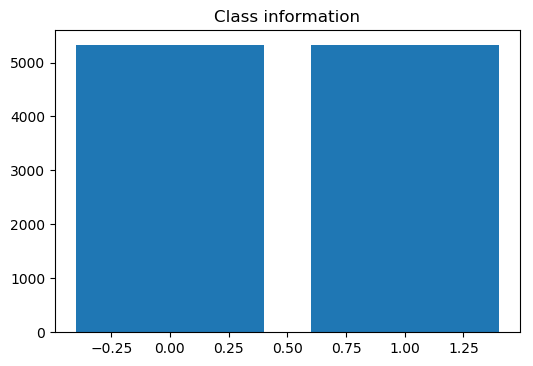

In [3]:
counter = Counter(reviews["Class"])
fig, ax = plt.subplots(dpi=100)
ax.bar(list(counter.keys()), list(counter.values()))
ax.set_title("Class information")
plt.show()

Splitting file into review and target vars

In [4]:
X, y = reviews["Review"],reviews["Class"]

Preprocess function

In [5]:
from nltk.stem import WordNetLemmatizer

def DocPreproc(X):
    
    documents = []
    
    stemmer = WordNetLemmatizer()

    for sen in range(0, (len(X))):  
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)

        documents.append(document)
    
    return(documents)

In [6]:
X_raw = DocPreproc(X)

CV RF and KNN methods for best parameters

In [7]:
df = pd.DataFrame(columns=["Method","Time","Score"])

In [8]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", RandomForestClassifier())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__n_estimators": (10,100),
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "RF",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

0.6986494091164884
{'classifier__n_estimators': 100, 'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'tfidfv__max_features': 3000}
Time elapsed: {} s 1151.0


In [9]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", KNeighborsClassifier())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__n_neighbors": (10,20,50,100),
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "KNN",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

0.7051209904333146
{'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'tfidfv__max_features': 3000, 'classifier__n_neighbors': 100}
Time elapsed: {} s 2017.0


In [10]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", MultinomialNB())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__alpha": (1e-2, 1e-3, 1e-4, 1e-5),
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "NB",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

0.7433877321328081
{'tfidfv__max_df': 0.3, 'classifier__alpha': 0.01, 'tfidfv__min_df': 5, 'tfidfv__max_features': 5000}
Time elapsed: {} s 368.0


In [11]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", DecisionTreeClassifier())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "DT",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

0.637685237291315
{'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'tfidfv__max_features': 5000}
Time elapsed: {} s 196.0


In [12]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", AdaBoostClassifier())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__n_estimators": (10,100,1000),
              "classifier__learning_rate": (0.5,1,2)
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "AdaBoost",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

0.6958356781091728
{'classifier__n_estimators': 1000, 'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'classifier__learning_rate': 0.5, 'tfidfv__max_features': 3000}
Time elapsed: {} s 6463.0


In [13]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", LogisticRegression())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__C": (1e-2, 1e-3, 1e-4, 1e-5),
              "classifier__penalty": ("l1","l2")
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "LogR",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7108422434815231
{'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'classifier__penalty': 'l2', 'tfidfv__max_features': 5000, 'classifier__C': 0.01}
Time elapsed: {} s 716.0


In [ ]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", MLPClassifier())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__activation": ("identity", "logistic", "tanh", "relu"),
              "classifier__hidden_layer_sizes": ((5, 5),(10, 10),(20, 20),(50, 50))
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "MLP",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

In [14]:
start = time.time()
pipe = Pipeline([("tfidfv", TfidfVectorizer(stop_words=stopwords.words('english'))),
                 ("classifier", SVC())])

parameters = {"tfidfv__max_features": (100,1000,3000,5000),
              "tfidfv__min_df": (5,10,50,100),
              "tfidfv__max_df": (0.3,0.5,0.7),
              "classifier__kernel": ("linear", "poly", "rbf", "sigmoid"),
              "classifier__degree": (3,5,7,10)
             }

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(X_raw, y)

print(grid.best_score_)
print(grid.best_params_)

print("Time elapsed: {} s",round(time.time()-start,0))

df = df.append({"Method": "SVC",
                "Time": round(time.time()-start,0),
               "Score":grid.best_score_},
               ignore_index = True)

C:\Users\Mantas Lukauskas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.738416807353217
{'tfidfv__max_df': 0.3, 'tfidfv__min_df': 5, 'tfidfv__max_features': 5000, 'classifier__kernel': 'linear', 'classifier__degree': 3}
Time elapsed: {} s 23086.0


In [15]:
df

,Method,Time,Score
0,RF,1151.0,0.698649
1,KNN,2017.0,0.705121
2,NB,368.0,0.743388
3,DT,196.0,0.637685
4,AdaBoost,6463.0,0.695836
5,LogR,716.0,0.710842
6,SVC,23086.0,0.738417


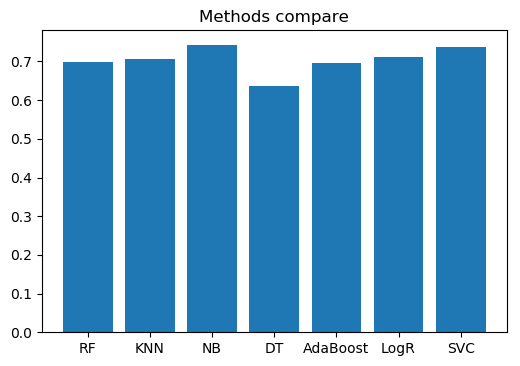

In [16]:
fig, ax = plt.subplots(dpi=100)
ax.bar(df["Method"], df["Score"])
ax.set_title("Methods compare")
plt.show()